# Practical 5 - Create a social network graph using retweet data. Find influencer nodes using centrality measures.

In [ ]:
import pandas as pd
import networkx as nx

In [ ]:
df = pd.read_csv('higgs-retweet_network.edgelist', sep=' ', names=['source', 'target', 'timestamp'])

In [ ]:
G = nx.DiGraph()

edges = list(zip(df['source'], df['target']))
G.add_edges_from(edges)

In [ ]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 256491
Number of edges: 328132


In [ ]:
# In-degree centrality: retweets received
in_degree_centrality = nx.in_degree_centrality(G)

# Betweenness centrality: information brokers
betweenness_centrality = nx.betweenness_centrality(G, k=1000, seed=42)

# PageRank: importance based on incoming links
pagerank = nx.pagerank(G, alpha=0.85)

# Combine into a DataFrame
centrality_df = pd.DataFrame({
    'node': list(G.nodes()),
    'in_degree': pd.Series(in_degree_centrality),
    'betweenness': pd.Series(betweenness_centrality),
    'pagerank': pd.Series(pagerank)
})

# Sort by PageRank (or any metric you want to highlight)
influencers = centrality_df.sort_values(by='pagerank', ascending=False).head(10)
print("Top 10 Influential Users (by PageRank):")
print(influencers)


Top 10 Influential Users (by PageRank):
          node  in_degree   betweenness  pagerank
88          88   0.054817  5.900889e-04  0.025752
2342      2342   0.003985  2.204392e-05  0.010622
64911    64911   0.000749  7.300580e-04  0.008049
14454    14454   0.024133  0.000000e+00  0.007876
677        677   0.021884  2.966951e-04  0.007466
39420    39420   0.000655  9.599572e-07  0.006628
1988      1988   0.016901  2.322850e-04  0.006016
3998      3998   0.003248  7.564954e-05  0.005560
134095  134095   0.000136  0.000000e+00  0.005535
169287  169287   0.000019  1.973582e-05  0.005508


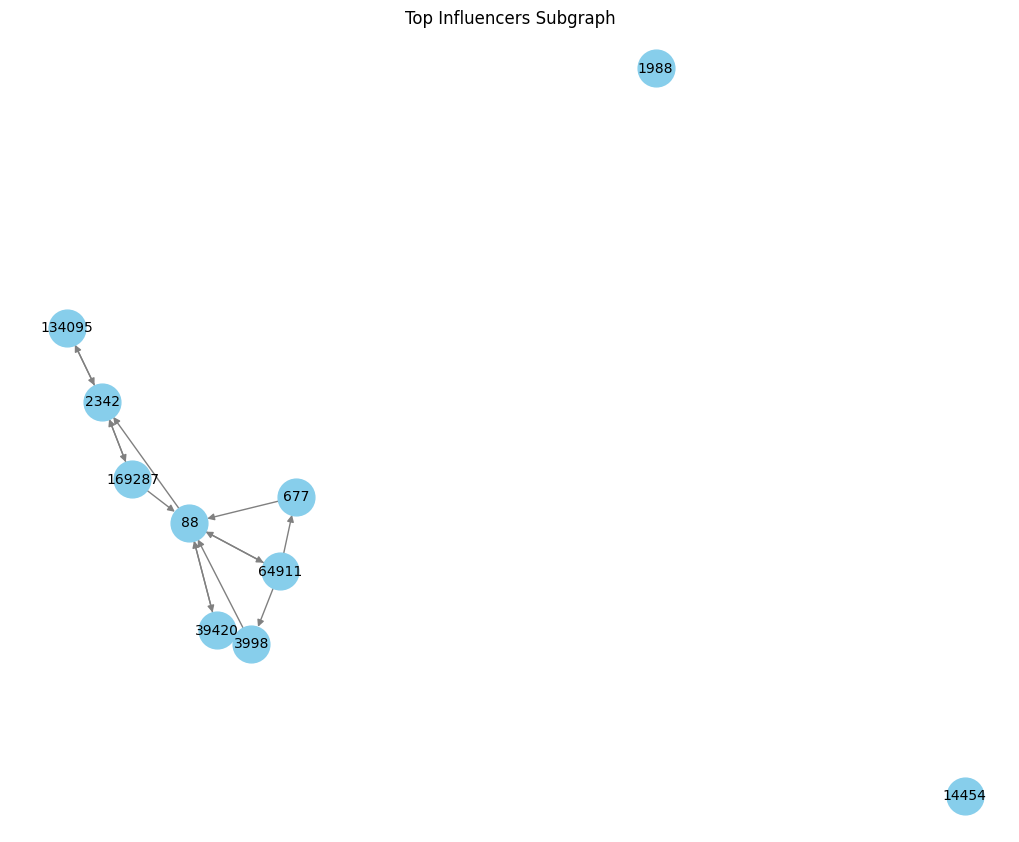

In [ ]:
import matplotlib.pyplot as plt

# Extract subgraph for top influencers
top_nodes = influencers['node'].tolist()
subgraph = G.subgraph(top_nodes)

# Draw
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(subgraph, seed=42)
nx.draw(subgraph, pos, with_labels=True, node_size=700,
        node_color='skyblue', edge_color='gray', font_size=10)
plt.title("Top Influencers Subgraph")
plt.show()
